In [45]:
# python notebook for Make Your Own Neural Network
# working with the MNIST data set
#
# (c) Tariq Rashid, 2016
# license is GPLv2

In [46]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [47]:
# CHANGE FILE LOCATION AS NEEDED
data_file_location = "/Users/PaulMorrison/William & Mary/Spring 20/CSCI 520/MYON Assignment/makeyourownneuralnetwork-master/mnist_dataset/mnist_train_100.csv"

# open the CSV file and read its contents into a list
data_file = open(data_file_location, 'r')
data_list = data_file.readlines()
data_file.close()

In [48]:
# check the number of data records (examples)
len(data_list)

100

In [49]:
# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

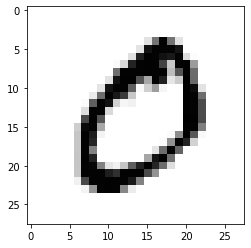

In [50]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [51]:
# scale input to range 0.01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [52]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [53]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [54]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

In [55]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [56]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [57]:
# test query (doesn't mean anything useful yet)
n.query([1.0, 0.5, -1.5])

array([[0.39534282],
       [0.53766645],
       [0.34200989]])

In [58]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [59]:
data_file_location = "/Users/PaulMorrison/William & Mary/Spring 20/CSCI 520/MYON Assignment/makeyourownneuralnetwork-master/mnist_dataset/mnist_train.csv"

# load the mnist training data CSV file into a list
training_data_file = open(data_file_location, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [60]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [61]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_dataset/mnist_test.csv'

In [ ]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass